In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## Create Features and it's Labels

In [2]:
X = torch.arange(start=0, end=50, step=0.5).unsqueeze(dim=1)
weight = 0.7
bias = 0.3
y = weight * X + bias

## Split data into train and test dataset

In [3]:
split = int(0.8*len(X))
train_features, train_labels = X[:split], y[:split]
test_features, test_labels = X[split:], y[split:]

print(f"Total features N = {len(X)} \nN_train = {len(train_features)} \nN_test = {len(test_features)}")

Total features N = 100 
N_train = 80 
N_test = 20


## Data visualization

In [4]:
def visualize(train_features,
              train_labels,
              test_features,
              test_labels,
              prediction=None):
    plt.figure(figsize=(4,4))
    plt.xlabel("Features")
    plt.ylabel("Labels")
    plt.scatter(train_features, train_labels, s=3, c='b', label='Train')
    plt.scatter(test_features, test_labels, s=3, c='g', label='Test')
    if prediction is not None:
        plt.scatter(test_features, prediction, s=3, c='r', label='Prediction')
    plt.legend(prop={"size": 10})

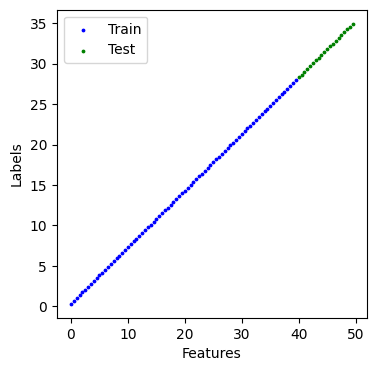

In [5]:
visualize(train_features=train_features,
          train_labels=train_labels,
          test_features=test_features,
          test_labels=test_labels)

## Build Model

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, X : torch.Tensor):
        return self.linear_layer(X)

In [7]:
model = LinearRegressionModel()

In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[0.2509]], requires_grad=True),
 Parameter containing:
 tensor([0.9534], requires_grad=True)]

In [9]:
torch.manual_seed(42)
with torch.inference_mode():
    y_pred = model(test_features)

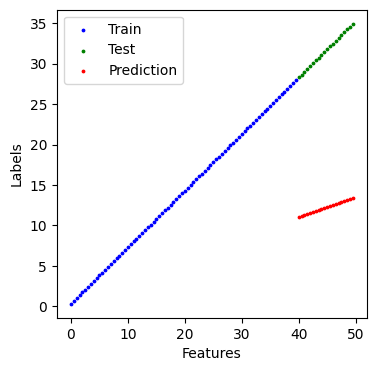

In [10]:
visualize(train_features=train_features,
          train_labels=train_labels,
          test_features=test_features,
          test_labels=test_labels,
          prediction=y_pred)

## Train Model

100%|██████████| 100/100 [00:00<00:00, 4655.73it/s]

Epoch : 0  |  Train_loss : 8.249  |  Test_loss : 18.562
Epoch : 10  |  Train_loss : 4.376  |  Test_loss : 9.760
Epoch : 20  |  Train_loss : 0.726  |  Test_loss : 1.301
Epoch : 30  |  Train_loss : 0.279  |  Test_loss : 0.393
Epoch : 40  |  Train_loss : 0.277  |  Test_loss : 0.395
Epoch : 50  |  Train_loss : 0.276  |  Test_loss : 0.364
Epoch : 60  |  Train_loss : 0.274  |  Test_loss : 0.396
Epoch : 70  |  Train_loss : 0.272  |  Test_loss : 0.397
Epoch : 80  |  Train_loss : 0.271  |  Test_loss : 0.399
Epoch : 90  |  Train_loss : 0.269  |  Test_loss : 0.367


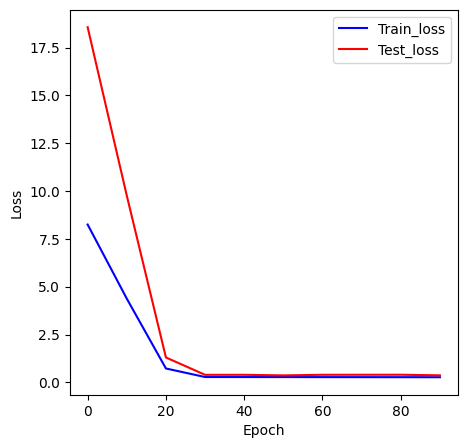

In [11]:
from tqdm import tqdm

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr= 0.001)
epochs = 100
epoch_track = []
train_loss_track = []
test_loss_track = []

for epoch in tqdm(range(epochs)):
    
    model.train()
    train_pred = model(train_features)
    train_loss = loss_fn(train_labels, train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(test_features)
        test_loss = loss_fn(test_labels, test_pred)

    if epoch%10 == 0:
        epoch_track.append(epoch)
        train_loss_track.append(train_loss)
        test_loss_track.append(test_loss)
        print(f"Epoch : {epoch}  |  Train_loss : {train_loss :.3f}  |  Test_loss : {test_loss:.3f}")


with torch.inference_mode():
    plt.figure(figsize=(5,5))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(epoch_track, train_loss_track, c='b', label='Train_loss')
    plt.plot(epoch_track, test_loss_track,c='r', label='Test_loss')
    plt.legend()

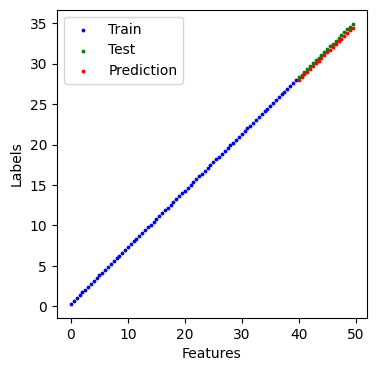

In [12]:
torch.manual_seed(42)
with torch.inference_mode():
    y_pred = model(test_features)


visualize(train_features=train_features,
          train_labels=train_labels,
          test_features=test_features,
          test_labels=test_labels,
          prediction=y_pred)